In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
through = pd.read_csv('./result/throughput.csv', index_col=0)
output = pd.read_csv('./result/output.csv', index_col=0)

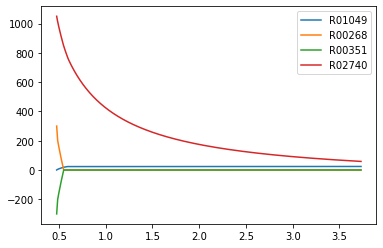

In [7]:
through.plot()

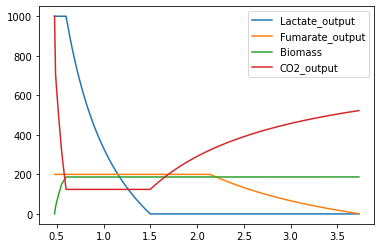

In [8]:
output.plot()

 - PPRP (R01049)、 aKG (R00268)
 - Citrate (R00351), Succinate (R00405), F6P (R02740)

In [77]:
t = through[(through.R00268 != 0) & (through.R00351 != 0)]
t = (t.T/np.array(t['R01049'])).T.dropna()

In [78]:
t.T

,0.551268,0.550661,0.550055,0.549451,0.548847,0.548246,0.547645,0.547046,0.546448,0.545852,...,0.480769,0.480307,0.479846,0.479386,0.478927,0.478469,0.478011,0.477555,0.477099,0.476644
R01049,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
R00268,0.025612,0.113120,0.201738,0.291487,0.382389,0.474467,0.567743,0.662241,0.757985,0.855000,...,124.670889,140.833038,161.035722,187.010594,221.643773,270.130202,342.85986,464.075953,706.508167,1433.804715
R00351,-0.025612,-0.113120,-0.201738,-0.291487,-0.382389,-0.474467,-0.567743,-0.662241,-0.757985,-0.855000,...,-124.670889,-140.833038,-161.035722,-187.010594,-221.643773,-270.130202,-342.85986,-464.075953,-706.508167,-1433.804715
R02740,44.084957,44.434988,44.789459,45.148455,45.512064,45.880375,46.253479,46.631470,47.014447,47.402507,...,501.119067,557.686553,628.395937,719.307999,840.524142,1010.226662,1264.78050,1689.036720,2537.549413,5083.087329


In [31]:
f = pd.read_excel('../result/metabo_mean.xlsx', index_col=0).T

,Glycolic acid,Lactic acid,Fumaric acid,Succinic acid,Malic acid,Glycerol 3-phosphate,Citric acid,Gluconic acid,Ribose 5-phosphate,Ribulose 5-phosphate,...,Citrulline,Tyr,Trp,Cytidine,Uridine,Inosine,Guanosine,Glutathione (GSSG) divalent,Glutathione (GSH),S-Adenosylmethionine
Control,0.656757,22.114443,0.512831,1.611297,1.322645,2.404587,0.178913,3.316074,0.051391,0.209665,...,0.062630,2.399036,0.430472,0.155248,0.497486,0.144949,0.034913,3.860838,2.235997,0.292358
Clone A,0.203403,153.663418,0.789446,2.781389,3.424035,0.419762,0.273265,0.741791,0.011793,0.152013,...,0.034055,8.089487,1.275946,0.223428,2.836100,0.470071,0.074219,7.792955,8.705294,1.001208
Clone B,0.417815,42.078506,0.240003,1.208359,0.980217,1.065645,0.198826,2.075096,0.064470,0.116267,...,0.101691,2.643728,0.434636,0.064629,0.744960,0.197533,0.037769,5.461468,4.647802,0.368639


In [54]:
PRPP = f[['Cytosine', 'Uracil', 'Adenine', 'Guanine']]
PRPP_sum = []
for i in PRPP.index:
    PRPP_sum.append(sum(PRPP.T[i]))

PRPP_sum = pd.DataFrame(PRPP_sum, columns=['PRPP'], index=PRPP.index)

In [55]:
PRPP

,Cytosine,Uracil,Adenine,Guanine
Control,0.005763,3.485738,0.036660,0.047642
Clone A,0.024320,41.358248,0.107928,0.167891
Clone B,0.003886,7.169363,0.028894,0.054382


In [56]:
pd.DataFrame(PRPP_sum, columns=['PRPP'], index=PRPP.index)

,PRPP
Control,3.575803
Clone A,41.658387
Clone B,7.256526


In [57]:
amino_acid = f[[
    'Ala', 'Arg', 'Asn', 'Asp', 'Gln', 'Glu', 'Gly', 'Ornithine', 'Pro', 'Ser'
]]

amino_acid_sum = []
for i in amino_acid.index:
    amino_acid_sum.append(sum(amino_acid.T[i]))
    
amino_acid_sum = pd.DataFrame(amino_acid_sum, columns=['amino_acid'], index=amino_acid.index)

In [118]:
metabo = pd.concat([
    f[['Fructose 6-phosphate', 'Citric acid']],
    amino_acid_sum,
    PRPP_sum
], axis=1).T

In [132]:
metabo = metabo/np.array(metabo.T['PRPP'])
metabo

,Control,Clone A,Clone B
Fructose 6-phosphate,0.040300,0.005538,0.013617
Citric acid,0.050034,0.006560,0.027400
amino_acid,40.580532,6.118281,12.373979
PRPP,1.000000,1.000000,1.000000


In [133]:
metabo.T/np.array(metabo['Control'])

,Fructose 6-phosphate,Citric acid,amino_acid,PRPP
Control,1.000000,1.000000,1.000000,1.0
Clone A,0.137432,0.131103,0.150769,1.0
Clone B,0.337894,0.547618,0.304924,1.0


In [134]:
t = t.rename(
    columns={
        'R01049': 'PRPP', 
        'R00268': 'amino_acid', 
        'R00351': 'Citric acid', 
        'R02740': 'Fructose 6-phosphate'
    }
)

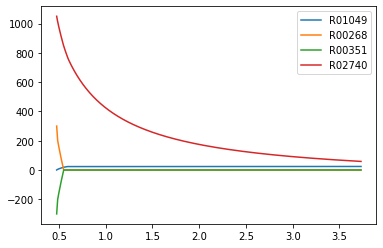

In [141]:
through.plot()

In [136]:
g = 10000
for i in t.index:
    mse = (
        (metabo['Control']['PRPP'] - t.T[i]['PRPP'])**2
        + (metabo['Control']['amino_acid'] - t.T[i]['amino_acid'])**2
#         + (metabo['Control']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (metabo['Control']['Citric acid'] - t.T[i]['Citric acid'])**2)
    if mse < g:
        g = mse
        print(i)

0.5512679162072768
0.5506607929515418
0.5500550055005501
0.5494505494505495
0.5488474204171241
0.5482456140350878
0.547645125958379
0.5470459518599562
0.5464480874316939
0.5458515283842795
0.5452562704471101
0.5446623093681917
0.5440696409140371
0.5434782608695652
0.5428881650380022
0.5422993492407809
0.5417118093174431
0.5411255411255411
0.5405405405405406
0.5399568034557235
0.5393743257820928
0.5387931034482759
0.5382131324004306
0.5376344086021505
0.5370569280343717
0.5364806866952789
0.5359056806002144
0.5353319057815846
0.5347593582887701
0.5341880341880342
0.5336179295624333
0.5330490405117271
0.5324813631522897
0.5319148936170213
0.5313496280552603
0.5307855626326964
0.5302226935312832
0.5296610169491526
0.5291005291005291
0.5285412262156448
0.5279831045406547
0.5274261603375527
0.5268703898840885
0.5263157894736842
0.5257623554153522
0.5252100840336135
0.5246589716684156
0.5241090146750524
0.5235602094240838
0.5230125523012552
0.522466039707419
0.5219206680584552
0.521376433785

In [137]:
g = 10000
for i in t.index:
    mse = (
        (metabo['Clone A']['PRPP'] - t.T[i]['PRPP'])**2
        + (metabo['Clone A']['amino_acid'] - t.T[i]['amino_acid'])**2
#         + (metabo['Clone A']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (metabo['Clone A']['Citric acid'] - t.T[i]['Citric acid'])**2)
    if mse < g:
        g = mse
        print(i)
        
# t.T[0.5512679162072768]

0.5512679162072768
0.5506607929515418
0.5500550055005501
0.5494505494505495
0.5488474204171241
0.5482456140350878
0.547645125958379
0.5470459518599562
0.5464480874316939
0.5458515283842795
0.5452562704471101
0.5446623093681917
0.5440696409140371
0.5434782608695652
0.5428881650380022
0.5422993492407809
0.5417118093174431
0.5411255411255411
0.5405405405405406
0.5399568034557235
0.5393743257820928
0.5387931034482759
0.5382131324004306
0.5376344086021505
0.5370569280343717
0.5364806866952789
0.5359056806002144
0.5353319057815846
0.5347593582887701
0.5341880341880342


In [138]:
g = 10000
for i in t.index:
    mse = (
        (metabo['Clone B']['PRPP'] - t.T[i]['PRPP'])**2
        + (metabo['Clone B']['amino_acid'] - t.T[i]['amino_acid'])**2
#         + (metabo['Clone B']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (metabo['Clone B']['Citric acid'] - t.T[i]['Citric acid'])**2)
    if mse < g:
        g = mse
        print(i)
        
# t.T[0.5512679162072768]

0.5512679162072768
0.5506607929515418
0.5500550055005501
0.5494505494505495
0.5488474204171241
0.5482456140350878
0.547645125958379
0.5470459518599562
0.5464480874316939
0.5458515283842795
0.5452562704471101
0.5446623093681917
0.5440696409140371
0.5434782608695652
0.5428881650380022
0.5422993492407809
0.5417118093174431
0.5411255411255411
0.5405405405405406
0.5399568034557235
0.5393743257820928
0.5387931034482759
0.5382131324004306
0.5376344086021505
0.5370569280343717
0.5364806866952789
0.5359056806002144
0.5353319057815846
0.5347593582887701
0.5341880341880342
0.5336179295624333
0.5330490405117271
0.5324813631522897
0.5319148936170213
0.5313496280552603
0.5307855626326964
0.5302226935312832
0.5296610169491526
0.5291005291005291
0.5285412262156448
0.5279831045406547
0.5274261603375527
0.5268703898840885
0.5263157894736842
0.5257623554153522
0.5252100840336135
0.5246589716684156
0.5241090146750524
0.5235602094240838
0.5230125523012552


In [94]:
metabo['Control']

Fructose 6-phosphate     0.040300
Citric acid              0.050034
amino_acid              40.580532
PRPP                     1.000000
Name: Control, dtype: float64

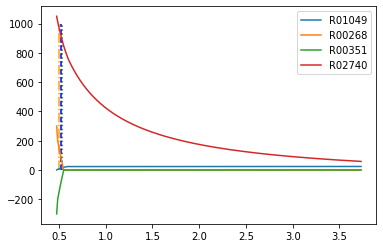

In [188]:
through.plot(logy=False)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([0.5341880341880342], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([0.499001996007984], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([0.5230125523012552], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

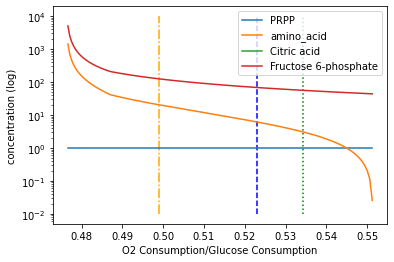

In [194]:
t.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([0.5341880341880342], 10**-2, 10**4, "green", linestyles='dotted', label='Clone A')
plt.vlines([0.499001996007984], 10**-2, 10**4, "orange", linestyles='dashdot', label='Control')
plt.vlines([0.5230125523012552], 10**-2, 10**4, "blue", linestyles='dashed', label='Clone B')

In [167]:
?pd.DataFrame.plot()

Object `pd.DataFrame.plot()` not found.
